#  Interface Object
An interface object establishes a connection between a file containing data and a data pool. Each interface object is capable of parsing a specific data format and convert the data into a dataframe. Below are the built-in interfaces in DataSurfer.

In [43]:
import datasurfer as ds

ds.list_interfaces()

,class,doc,file extension
name,,,
AMEDATA_OBJECT,<class 'datasurfer.lib_objects.amedata_object....,\n A class reads AMESim tables.\n\n Att...,[.data]
AMEGP_OBJECT,<class 'datasurfer.lib_objects.amegp_object.AM...,\n Represents an object for handling AMEGP ...,[.gp]
AMERES_OBJECT,<class 'datasurfer.lib_objects.ameres_object.A...,\n Represents an object for handling AMERES...,[.results]
ASAMMDF_OBJECT,<class 'datasurfer.lib_objects.asammdf_object....,\n Represents an ASAM MDF object.\n\n Ar...,[mf4]
DATA_OBJECT,<class 'datasurfer.lib_objects.data_object.DAT...,\n Represents a data object.\n\n Args:\n...,[.npz]
KF_OBJECT,<class 'datasurfer.lib_objects.femke_object.KF...,\n A class representing a KF_OBJECT.\n\n ...,[*.kf]
FINANCE_OBJECT,<class 'datasurfer.lib_objects.finance_object....,\n A class representing a finance object.\n...,"[.csv, .xlsx, .xls]"
PANDAS_OBJECT,<class 'datasurfer.lib_objects.pandas_object.P...,\n A class representing a Pandas object.\n\...,"[.xlsx, .csv, .xls]"
JSON_OBJECT,<class 'datasurfer.lib_objects.json_object.JSO...,\n Represents a JSON object.\n\n Args:\n...,[.json]


From the table, you can discover the interface names, their locations in DataSurfer, associated documentation, and corresponding data format extensions.

## Create an Interface Object

To create an interface, simply provide the file path and a comment. The following example demonstrates the creation of a JSON file interface.

In [44]:
from datasurfer import JSON_OBJECT

obj = JSON_OBJECT(r'demo_data\data3.json', comment='A JSON object with comments')

obj

<JSON_OBJECT@data3>

## Display the Data in File

Each interface object maintains a dataframe containing the data you wish to extract from the file. You can utilize the following command to display the dataframe.

In [45]:
obj.dataframe # or "obj.df"

,c,d,e,f,g
0,0.996721,0.633303,0.439255,0.589913,0.007243
1,0.576359,0.571012,0.067159,0.514568,0.874053
2,0.853079,0.963960,0.634992,0.760537,0.368018


## Search an existing signal in the object

By given a regular expression pattern, you can locate the signal you are seeking.

In [46]:
obj[r'.*c']

['c']

## Create new signals using interface function

Through the interface object, new signals can be defined inside of object using the following methods:

In [47]:
# Direct assignment
obj['h'] = 1

obj.dataframe

,c,d,e,f,g,h
0,0.996721,0.633303,0.439255,0.589913,0.007243,1
1,0.576359,0.571012,0.067159,0.514568,0.874053,1
2,0.853079,0.963960,0.634992,0.760537,0.368018,1


In [48]:
obj['i'] = obj['c'] + obj['d']

obj.dataframe

,c,d,e,f,g,h,i
0,0.996721,0.633303,0.439255,0.589913,0.007243,1,1.630024
1,0.576359,0.571012,0.067159,0.514568,0.874053,1,1.147370
2,0.853079,0.963960,0.634992,0.760537,0.368018,1,1.817038


## Save Interface Data to a CSV File

Since the interface data is stored in a dataframe format, you can export the modified data into other formats using dataframe methods.

In [49]:
obj.dataframe.to_csv('demo_data\data4.csv')

## Transform one Interface Object into Another

Some interface objects support intermediate transformations. For instance, we can convert a JSON object into a string object:

In [50]:
from datasurfer import STRING_OBJECT

# Convert Json to String
new_obj = obj >> STRING_OBJECT

# Print the string
print(new_obj.dfstring())

          c         d         e         f         g    h         i
0  0.996721  0.633303  0.439255  0.589913  0.007243  1.0  1.630024
1  0.576359  0.571012  0.067159  0.514568  0.874053  1.0  1.147370
2  0.853079  0.963960  0.634992  0.760537  0.368018  1.0  1.817038


## Create a New Interface Type Using the Template.

You can create your own interface type to access your data. DataSurfer provides a template to inherit from, ensuring that various files will have the same methods to access the data. In the following example, we will demonstrate how to create a new data interface to access a text file.

In [51]:
import pandas as pd
from datasurfer import DataInterface

class TEXT_OBJECT(DataInterface):
    
    def __init__(self, path, comment=None):
        super().__init__(path, comment=comment)

    def get_df(self):
        
        # Read the text file
        with open(self.path, 'r') as f:
            data = f.readlines()
        
        
        # Create a dataframe
        df = pd.DataFrame(data[1:], columns=[data[0].strip()])
        
        return df
    
    
txt_obj = TEXT_OBJECT(r'demo_data\data1.csv')
txt_obj.dataframe

,"a,b,c,d,e"
0,"0.10748199563736627,0.567579715667491,0.503205..."
1,"0.7199986108589298,0.11740810036850002,0.68996..."
2,"0.3644930246645035,0.5473683737475761,0.675610..."
3,"0.0034479401916363006,0.7764282458981703,0.403..."


In the previous example, the method has been overridden to read a text file and convert it to a dataframe. The method get_df() is invoked by the DataInterface class to retrieve the dataframe. It is anticipated that this method will return a dataframe.

## Visualizing the Data

Ultimately, you can visualize the data of the object by utilizing internal methods.

<Axes: xlabel='c', ylabel='d'>

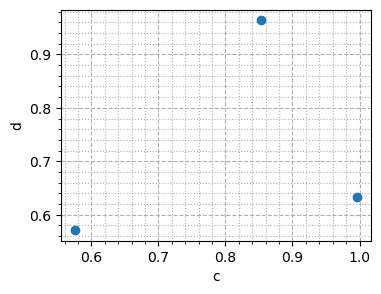

In [54]:
obj.plot.set_figparam(figsize=(4, 3)).scatter('c', 'd', setax=True)